# Programming Project 9: Implement CUDA Count3s


name: Jameson Jolley<br>
date: dec 5 2025 
___

# intro 


In this assignment, we are investigating CUDA and comparing it to normal parallelism. CUDA, which stands for Compute Unified Device Architecture, is a parallel computing platform and application programming interface (API) model created by NVIDIA. It was officially released in 2007 and is used for programming on a GPU
___

# methods

For these experiments, we will make graphs of performance for array sizes of 100K, 1M, 10M, and 100M, and for thread/process counts of 64, 128, 256, 512, and 1024. We used the code from before and modified it to have the CUDA count. We then store the time in a CSV file and use matplotlib to plot the standard deviation. The experiment was run on the Allen host in the cs domain. 
___

# data 

<Figure size 1200x800 with 0 Axes>

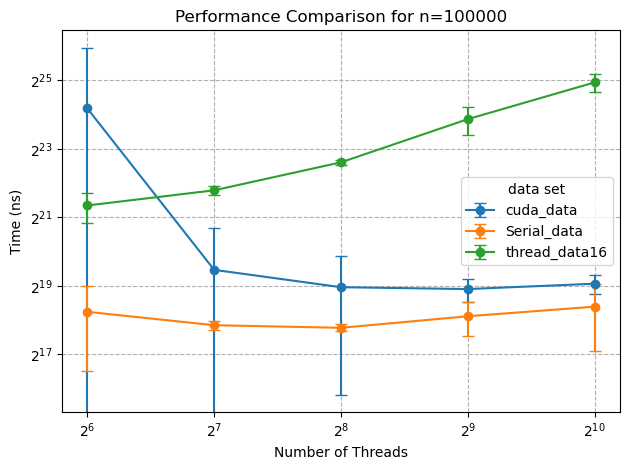

<Figure size 1200x800 with 0 Axes>

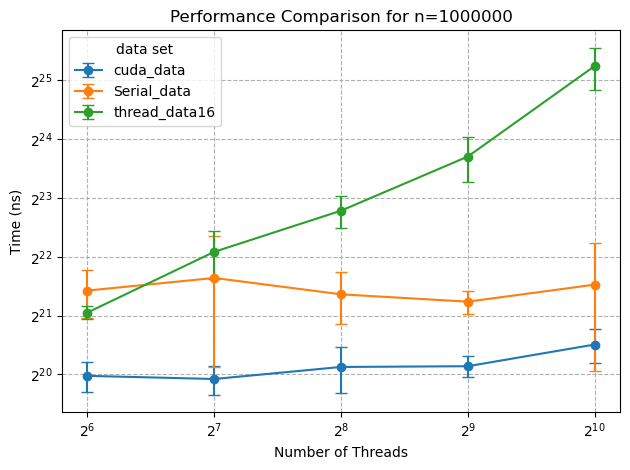

<Figure size 1200x800 with 0 Axes>

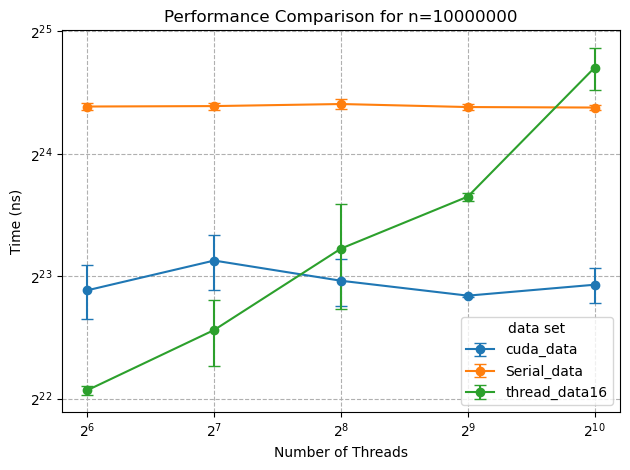

<Figure size 1200x800 with 0 Axes>

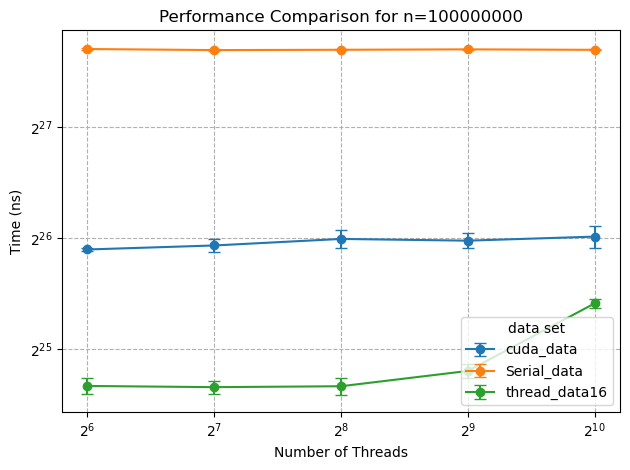

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
csv_files = ['cuda_data.csv',
'Serial_data.csv',
'thread_data16.csv',
]
for csv_file in csv_files: # we loop over them
    df = pd.read_csv(csv_file) # load them into a data frame
    sizes_of_n = df['size of n'].unique() # removes dups or removes the cartesian p
# List of problem sizes (n values) to plot
n_values = sizes_of_n
for n_val in n_values:
    plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots()
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        label = os.path.splitext(os.path.basename(csv_file))[0]
        grouped = df.groupby(['size of n', 'number of threads'])['time in ns']
        mean = grouped.mean().reset_index()
        std = grouped.std().reset_index()
        mask = mean['size of n'] == n_val
        threads = mean.loc[mask, 'number of threads']
        avg = mean.loc[mask, 'time in ns']
        error = std.loc[mask, 'time in ns']
       
        ax.errorbar(
            threads,
            avg,
            yerr=error,
            marker='o',
            capsize=4,
            label=label
        )
        
    ax.set_xlabel('Number of Threads')
    ax.set_ylabel('Time (ns)')
    ax.set_title(f'Performance Comparison for n={n_val}')
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=2)
    ax.legend(title='data set')
    ax.grid(True, which='both', ls='--')
    plt.tight_layout()
    plt.show()